## Part 3: Processing as optimization

In this part, we focus on processing dynamics of a GSC model. In the first half, we present three kinds of constraints that a GSC parser tries to optimize with their underlying motivations. A harmony function is defined as a measure of constraint satisfaction for each constraint. A GSC model tries to maximize its value by stochastic gradient ascent. For the readers who may want to understand every detail of the model, we present the gradient of each harmony function with respect to an activation state as well. But it suffices to understand that (1) harmony functions were constructed to measure the goodness of an activation state with regard to different kinds of constraints and (2) the activation state change follows the gradient of such harmony functions. 

In the second half, with a simple grammar example, we show the contribution of each kind of constraints separately first, and then with much more simplified low-dimensional systems, we explain schematically how a GSC model can handle local ambiguity naturally arising in incremental processing. 

### Notations

* $\mathbf{n} = \mathbf{a}_\mathrm{n}$: an activation pattern $\mathbf{a}$ in neural coordinates
* $\mathbf{c} = \mathbf{a}_\mathrm{c}$: an activation pattern $\mathbf{a}$ in conceptual coordinates
* $\mathbf{N}$: a conceptual-to-neural change-of-basis matrix; $\mathbf{n} = \mathbf{N} \mathbf{c}$
* $\mathbf{C} = \mathbf{N}^{-1}$: a neural-to-conceptual change-of-basis matrix; $\mathbf{c} = \mathbf{C} \mathbf{n}$
* $\mathbf{W}_\mathrm{n}$: a weight matrix in neural coordinates
* $\mathbf{W}_\mathrm{c}$: a weight matrix in conceptual coordinates
* $\mathbf{b}_\mathrm{n}$: a bias vector in neural coordinates
* $\mathbf{b}_\mathrm{c}$: a bias vector in conceptual coordinates
* $\mathbf{e}_\mathrm{n}$: an external input vector in neural coordinates
* $\mathbf{e}_\mathrm{c}$: an external input vector in conceptual coordinates
* $\mathbf{z}_\mathrm{n}$: a baseline (resting) activation state in neural coordinates
* $\mathbf{z}_\mathrm{c}$: a baseline (resting) activation state in conceptual coordinates
* $\mathit{\phi\rho}$: an index for each component of an activation vector in neural coordinates; the $\mathit{\phi\rho}$-th component of the activation vector can be viewed as a product of the $\phi$-th component of a filler representation vector and the $\rho$-th component of a role activation vector.
* $\mathit{fr}$: an index for each component of an activation vector in conceptual coordinates;  the $\mathit{fr}$-th component of the activation vector (i.e., the activation of a binding $\texttt{f/r}$) can be viewed as a product of the $f$-th component of a filler representation vector and the $r$-th component of a role activation vector.

### Constraint I: Grammatical constraints

We define grammar harmony $H_G(\mathbf{n})$ evaluated at $\mathbf{n}$ as follows:

* $H_G(\mathbf{n}; \mathbf{e}_\mathrm{n}) = 0.5 \mathbf{n}^\mathrm{T} \mathbf{W}_\mathrm{n} \mathbf{n} + \mathbf{b}_\mathrm{n}^\mathrm{T} \mathbf{n} + \mathbf{e}_\mathrm{n}^\mathrm{T} \mathbf{n}$ 

Grammar harmony measures how much an activation state $\mathbf{n}$ satisfies the grammatical constraints specified in a harmonic grammar. Because $\mathbf{n} = \mathbf{N} \mathbf{c}$ and $\mathbf{e}_\mathbf{c} = \mathbf{N} \mathbf{e}_\mathrm{c}$, 

* $H_G(\mathbf{n}; \mathbf{e}_\mathrm{n}) \\
= 0.5 (\mathbf{N} \mathbf{c})^\mathrm{T} \mathbf{W}_\mathrm{n} (\mathbf{N} \mathbf{c}) + \mathbf{b}_\mathrm{n}^\mathrm{T} (\mathbf{N} \mathbf{c}) + (\mathbf{N} \mathbf{e}_\mathrm{c})^\mathrm{T} (\mathbf{N} \mathbf{c}) \\
= 0.5 \mathbf{c}^\mathrm{T} (\mathbf{N}^\mathrm{T} \mathbf{W}_\mathrm{n} \mathbf{N}) \mathbf{c} + (\mathbf{N}^\mathrm{T} \mathbf{b}_\mathrm{n})^\mathrm{T} \mathbf{c} + \mathbf{e}_\mathrm{c}^\mathrm{T} (\mathbf{N}^\mathrm{T} \mathbf{N}) \mathbf{c} \\
= 0.5 \mathbf{c}^\mathrm{T} \mathbf{W}_\mathrm{c} \mathbf{c} + \mathbf{b}_\mathrm{c}^\mathrm{T} \mathbf{c} + \mathbf{e}_\mathrm{c}^\mathrm{T} (\mathbf{N}^\mathrm{T} \mathbf{N}) \mathbf{c}$

where $\mathbf{W}_\mathrm{c} = \mathbf{N}^\mathrm{T} \mathbf{W}_\mathrm{n} \mathbf{N}$ and $\mathbf{b}_\mathrm{c} = \mathbf{N}^\mathrm{T} \mathbf{b}_\mathrm{n}$. $\mathbf{W}_\mathrm{c}$ and $\mathbf{b}_\mathrm{c}$ are given by a harmonic grammar so we can easily compute $\mathbf{W}_\mathrm{n}$ and $\mathbf{b}_\mathrm{n}$. The last term in the above equation measures how much the current state satisfies the *faithfulness* constraint that the present state must be the same as external input. If neural encodings of bindings are orthogonal, $\mathbf{N}^\mathrm{T} \mathbf{N} = \mathbf{N}^\mathrm{-1} \mathbf{N} = \mathbf{I}$ so the last term simply becomes $\mathbf{e}_\mathrm{c}^\mathrm{T} \mathbf{c}$. (The software stores $\mathbf{N}$ in the attribute TP and its inverse $\mathbf{C} = \mathbf{N}^{-1}$ in the attribute TPinv.)

* $\nabla_{\mathbf{n}} H_G(\mathbf{n}; \mathbf{e}_\mathrm{n}) = \mathbf{W}_\mathrm{n} \mathbf{n} + \mathbf{b}_\mathrm{n} + \mathbf{e}_\mathrm{n}$

### Constraint II: Baseline constraint

We introduce the second kind of constraints that an activation state $\mathbf{n}$ stays at a baseline (or resting) state $\mathbf{z}_\mathrm{n} = \mathbf{N} \mathbf{z}_\mathrm{c}$ and define *bowl harmony* $H_B$ as follows:

* $H_B(\mathbf{n}; \beta, \mathbf{z}_\mathrm{n})\\
= -0.5 \beta\, \|\mathbf{n} - \mathbf{z}_\mathrm{n}\|^2 \\
= -0.5 \beta\, (\mathbf{n} - \mathbf{z}_\mathrm{c})^\mathrm{T} (\mathbf{n} - \mathbf{z}_\mathrm{n}) \\
= -0.5 \beta\, (\mathbf{N} \mathbf{c} - \mathbf{N} \mathbf{z}_\mathrm{c})^\mathrm{T} (\mathbf{N} \mathbf{c} - \mathbf{N} \mathbf{z}_\mathrm{c}) \\
= -0.5 \beta\, (\mathbf{c} - \mathbf{z}_\mathrm{c})^\mathrm{T} (\mathbf{N}^\mathrm{T} \mathbf{N}) (\mathbf{c} - \mathbf{z}_\mathrm{c}) $ 

We set $\mathbf{z}_\mathrm{c}$ to $0.5 \vec{\mathbf{1}}$, the center of a unit hypercube in the conceptual space. The role of this constraint should be clear from its derivative.

* $\nabla_{\mathbf{n}} H_B(\mathbf{n}; \beta) = -\beta\, (\mathbf{n} - \mathbf{z}_{n})$

If a unit's activation value is greater than its resting level, it will decrease. If a unit's activation value is lower than its resting level, it will increase. Thus, it creates a force to pull a state to its resting state. The parameter $\beta$ determines the relative strength of the baseline constraint. The minimal requirement for the parameter is that its value must be greater than the maximum eigenvalue of $\mathbf{W}_\mathrm{c}$. Given a harmonic grammar, the software will set its value automatically but users can set it to a certain value manually. When the discreteness pressure is minimal (see below), this constraint prevents the model from exploding; in other words, if $\beta$ is set appropriately, the system is stable and has a single, globally optimal solution, which is a neural state that the system reaches in the long run. 

### Constraint III: Quantization constraint

Because the end product of incremental parsing must be a discrete symbolic structure, we introduce the discreteness constraint such that every role must be occupied by a single filler. (Note: as we discussed in Part 1, the current version of the software treats an empty role as a binding of a role with a null filler, which makes the equation simpler.) 

The constraint is implemented as a combination of two different constraints: (a) each binding's activation must be either 0 or 1. (b) the sum of the squared activations of bindings in each group of competing bindings must be 1. We define the amount of constraint satisfaction as follows:

* $H_{Q_0}(\mathbf{n}) = -\sum_{fr} c_{fr}^2 (1 - c_{fr})^2$ 


* $H_{Q_1}(\mathbf{n}) = -\sum_{g \in I(\mathbf{B})} [(\sum_{fr\, \in I(\mathbf{B_g})} c_{fr}^2) - 1]^2$

where $c_{fr}$ is a $\mathit{fr}$-th component of $\mathbf{c} = \mathbf{C} \mathbf{n}$; $I(\mathbf{B})$ is an index set of $\mathbf{B} = \{\mathbf{B}_1, \mathbf{B}_2, \cdots\}$; $\mathbf{B}_i$ is a set of bindings that compete with each other. Each set of f/r bindings with a span role constitutes such a subset $\mathbf{B}_i$ because only one filler can be bound to a role. $c_{fr} = \sum_{\phi \rho} \mathbf{C} (\mathit{fr}, {\phi \rho}) \mathbf{n}({\phi \rho})$ where $\mathbf{C}(\mathit{fr}, {\phi \rho})$ is the ($\mathit{fr}$, $\phi \rho$)-th element of $\mathbf{C}$ and $\mathbf{n}(\phi \rho)$ is the ($\phi \rho$)-th neural coordinate of the activation vector. We will simpify the notation using Einstein summation convention such that $c_{fr} = \mathbf{C}_{fr}^{\phi \rho} \mathbf{n}_{\phi \rho}$ (sum over up-down pairs). Then, $\frac{\partial}{\partial n_{\phi\rho}} c_{fr} = \mathbf{C}_{fr}^{\phi\rho}$

Because we are interested in the activation state change in neural coordinates, we compute the partial derivative of the two harmony equations with respect to the (${\phi \rho}$)-th component of $\mathbf{n}$ as follows: 

* $\nabla_{\phi \rho} H_{Q_0}(\mathbf{n}) \equiv \frac{\partial H_{Q_0}(\mathbf{n})}{\partial n_{\phi\rho}} \\
= -\frac{\partial}{\partial n_{\phi\rho}} \sum_{fr}[c_{fr}^2 - 2c_{fr}^3 + c_{fr}^4] \\
= -\sum_{fr} [2 c_{fr} \frac{\partial c_{fr}}{\partial n_{\phi\rho}} - 6 c_{fr}^2 \frac{\partial c_{fr}}{\partial n_{\phi\rho}} + 4 c_{fr}^3 \frac{\partial c_{fr}}{\partial n_{\phi\rho}}] \\
= -2\sum_{fr} \mathbf{C}_{fr}^{\phi\rho} c_{fr} (1 - c_{fr}) (1 - 2c_{fr})$


* $\nabla_{\phi\rho} H_{Q_1}(\mathbf{n}) \equiv \frac{\partial H_{Q_1}(\mathbf{n})}{\partial n_{\phi\rho}}\\
= -\frac{\partial}{\partial n_{\phi\rho}} \sum_{g} [(\sum_{fr(g)} c_{fr(g)}^2)^2 - 2(\sum_{fr(g)} c_{fr(g)}^2) + 1] \\
= -\sum_{g} \frac{\partial}{\partial n_{\phi\rho}} (\sum_{fr(g)} c_{fr(g)}^2)^2 + 2 \sum_{g} \frac{\partial}{\partial n_{\phi\rho}} \sum_{fr(g)} c_{fr(g)}^2\\
= -\sum_{g} [2(\sum_{fr(g)} c_{fr(g)}^2)  \frac{\partial \sum_{f'} c_{f'r}^2}{\partial n_{\phi\rho}}] + 2 \sum_{g} \frac{\partial \sum_{f'} c_{f'r}^2}{\partial n_{\phi\rho}} \\
= -2\sum_{g} \{ [(\sum_{fr(g)} c_{fr(g)}^2)-1]  \frac{\partial \sum_{f'} c_{f'r}^2}{\partial n_{\phi\rho}} \}\\
= -2\sum_{g} \{ [(\sum_{fr(g)} c_{fr(g)}^2)-1]  \sum_{f'} 2 c_{f'r} \frac{\partial c_{f'r}}{\partial n_{\phi\rho}} \}\\
= -4\sum_{g} \{ [(\sum_{fr(g)} c_{fr(g)}^2)-1]  \sum_{f'} c_{f'r} \mathbf{C}_{f'r}^{\phi\rho} \}$

Then, the harmony value of an activation state given the discreteness constraint is defined as a weighted sum of the above two terms. 

* $H_Q(\mathbf{n}) = 0.5 H_{Q_0}(\mathbf{n}) + 0.5 H_{Q_1}(\mathbf{n})$


* $\nabla_{\phi\rho} H_Q(\mathbf{n}) = 0.5 \nabla_{\phi\rho} H_{Q_0}(\mathbf{n}) + 0.5 \nabla_{\phi\rho} H_{Q_1}(\mathbf{n})$.

### Constraints combined

The *total harmony* of a neural state $\mathbf{n}$ given external input $\mathbf{e}_\mathrm{n}$ and discreteness pressure $q$ is defined as follows:

* $H(\mathbf{n}; \mathbf{e}_\mathrm{n}, q) = H_G(\mathbf{n}; \mathbf{e}_\mathrm{n}) + H_b(\mathbf{n}) + q H_Q(\mathbf{n})$

where $q$ is a dynamic parameter weighting the discretness constraint. Because the goal of GSC is to build a discrete symbolic structre, we assume that $q$, the relative strength of the discreteness constraint or simply the discreteness pressure, gradually increases in time. In the current version of the software, $q$ changes linearly as a function of time up to an upper bound (200, in the default setting) that users can change.  

### Processing as harmony maximization

A GSC model tries to maximize the harmony value by stochastic gradient ascent. The state change is as follows:

* $d\mathbf{n}\, /\, \mathit{dt} = \nabla_{\mathbf{n}} H(\mathbf{n}; \mathbf{e}_\mathrm{n}, q) + \sqrt{2T} dW$

where $W$ is the standard Wiener process and $T$ is a computational temperature, determining the noise magnitude. 

## Demo

In this section, we build a simple GSC model and investigate the contribution of each kind of constraint. To make dynamics clearer, we will set computational temperature $T$ to 0.

In [1]:
%matplotlib inline
import gsc
import matplotlib.pyplot as plt
import numpy as np

Consider a simple grammar G = {S $\rightarrow$ A B | X Y}. Let T1 and T2 be the parse trees of the two grammatical sentences: T1=[$_\mathrm{S}$ [$_\mathrm{S[1]}$ [A B]]] and T2=[$_\mathrm{S}$ [$_\mathrm{S[2]}$ [X Y]]].

In [2]:
gram = 'S -> A B | X Y'
hg1 = gsc.HarmonicGrammar(cfg=gram, size=2, role_type='span_role', unary_base='filler')
opts1 = {'T_init': 0, 'T_min': 0}               # set the initial and the minimal value of T to 0
net = gsc.GscNet(hg=hg1, opts=opts1, seed=100)

#### Baseline constraint only

The GSC model uses all three kinds of constraints to build a discrete symbolic structure. But the users can turn off the contribution of each constraint by setting some parameters as follows.

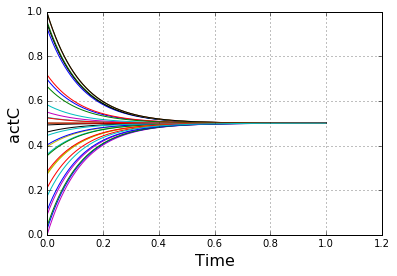

In [3]:
net.reset()                  # Set q and T to their initial values (q_init=0, T_init).
net.opts['H0_on'] = False    # Turn off the contribution of H0 (grammar harmony H_G)
net.opts['H1_on'] = True     # Turn on the contribution of H0 (grammar harmony H_G)
net.opts['Hq_on'] = False    # Turn off the contribution of Hq (H_Q)
net.run(1)                   # Integrate a system of stochastic differential equations for a given duration
net.plot_trace('actC')       # Plot the trace of activation state in "C"onceptual coordinates

As you can see, the system reaches an equilibrium state, which is $\mathbf{z}_\mathrm{c} = 0.5 \vec{\mathbf{1}}$. It contributes to the stability of the system. 

#### Grammatical constraints only

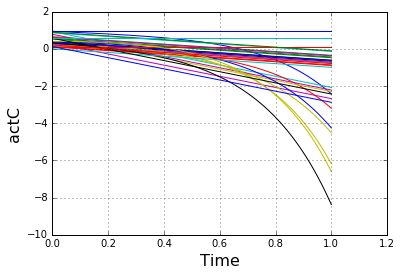

In [4]:
net.reset()                  # Set q and T to their initial values (q_init=0, T_init).
net.opts['H0_on'] = True     # Turn on the contribution of H0 (grammar harmony H_G)
net.opts['H1_on'] = False    # Turn off the contribution of H0 (grammar harmony H_G)
net.opts['Hq_on'] = False    # Turn off the contribution of Hq (H_Q)
net.run(1)                   # Integrate a system of stochastic differential equations for a given duration
net.plot_trace('actC')       # Plot the trace of activation state in "C"onceptual coordinates

When both baseline and quantization constraints are turned off, the system loses its stability and explodes.

#### Grammatical constraints + baseline constraint

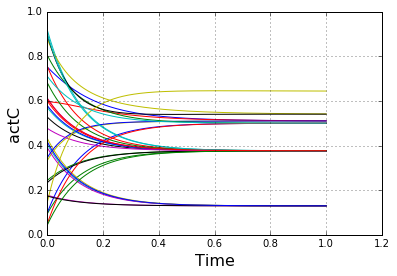

In [5]:
net.reset()
net.opts['H0_on'] = True     # Turn off the contribution of H0 (grammar harmony H_G)
net.opts['H1_on'] = True     # Turn off the contribution of H0 (grammar harmony H_G)
net.opts['Hq_on'] = False    # Turn off the contribution of Hq (H_Q)
net.run(1)
net.plot_trace('actC')

         (0,1)     (1,2)   (0,1,2)     (0,2)
A     0.510809  0.376504  0.376655  0.376697
B     0.376460  0.510763  0.376600  0.376573
S     0.376609  0.376702  0.376613  0.644068
S[1]  0.129711  0.129706  0.541665  0.129643
S[2]  0.129644  0.129719  0.540520  0.129714
X     0.509968  0.376501  0.376603  0.376445
Y     0.376588  0.509972  0.376633  0.376612
_     0.499882  0.500090  0.499867  0.500062


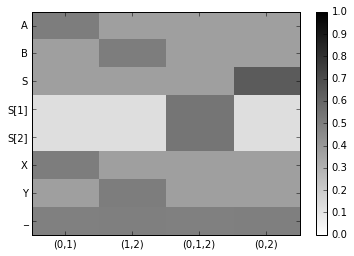

In [6]:
net.read_state()     # Print the current state in conceptual coordinates
net.plot_state()     # Plot the current state in conceptual coordinates in a heatmap

First, each binding with the null filler has the value of 0.5; due to precision issues, the actual values are not exactly 0.5. Those bindings do not interact with others so the state change in the bindings are govenred only by the baseline constraint. 

Second, the model prefers the constituents of a grammatical structure to other constituents. For example, $\texttt{A/(0,1)}$ is preferred to $\texttt{B/(0,1)}$. This is because the former receives additional supporting signal from its grammatical mother $\texttt{S[1]/(0,1,2)}$ while the latter does not receive such top-down support.  Due to the negative bias, any binding with no top-down support will have an activation value smaller than 0.5. 

Third, $\texttt{S[1]/(0,1)}$ has a more negative bias (see Part 1) so it is less activated than other ungrammatical bindings (e.g., $\texttt{B/(0,1)}$) in the equilibrium state. 

The blend state does not tell us how the grammatical bindings must be combined. As we discussed in Part 2, the blend state may be viewed as a blend of two grammatical structures T1 and T2 or a blend of two ungrammatical structures T3=[$_\mathrm{S}$ [$_\mathrm{S[1]}$ [A Y]]] and T4=[$_\mathrm{S}$ [$_\mathrm{S[2]}$ [X B]]]. We will briefly show that, from the apparently ambiguous blend state, the GSC model can build either T1 or T2 but neither T3 nor T4 by increasing the quantization constraint gradually. 

NOTE: In fact, it is misleading to say that the blend state is a blend of multiple discrete structures (e.g., T1 and T2 in the present example) because the model does not monitor global coherence. We must say that a blend state is a state in which each role is occupied by a blend of fillers. 

#### Quantization constraint only

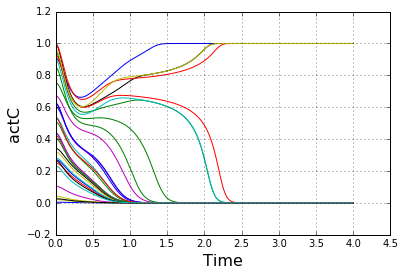

In [7]:
net.reset()
net.opts['H0_on'] = False     # Turn off the contribution of H0 (grammar harmony H_G)
net.opts['H1_on'] = False     # Turn off the contribution of H0 (grammar harmony H_G)
net.opts['Hq_on'] = True      # Turn off the contribution of Hq (H_Q)
net.run(4)
net.plot_trace('actC')

The second kind of constraints is applied to each role (a group of bindings bound to the same role).

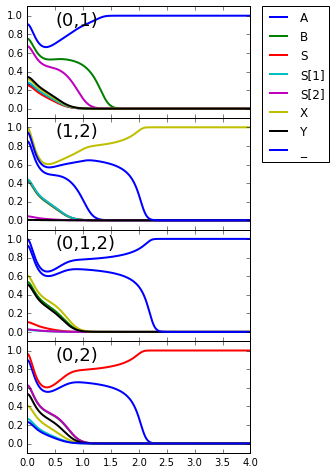

In [8]:
# the model stores the activation trace in neural coordinates
# we convert it to the trace in conceptual coordinates manually.
actC_trace = net.N2C(net.traces['act'].T).T
t_trace = net.traces['t']

# Then, we choose each subgroup of bindings that compete with each other.
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True, figsize=(4,8))
ax1.plot(t_trace, actC_trace[:, net.find_roles('(0,1)')], lw=2)
ax1.text(0.5, 0.9, '(0,1)', fontsize=18)
ax1.set_xlim(0, 4)
ax1.set_ylim(-0.1, 1.1)
ax1.legend(net.filler_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.plot(t_trace, actC_trace[:, net.find_roles('(1,2)')], lw=2)
ax2.text(0.5, 0.9, '(1,2)', fontsize=18)
ax3.plot(t_trace, actC_trace[:, net.find_roles('(0,1,2)')], lw=2)
ax3.text(0.5, 0.9, '(0,1,2)', fontsize=18)
ax4.plot(t_trace, actC_trace[:, net.find_roles('(0,2)')], lw=2)
ax4.text(0.5, 0.9, '(0,2)', fontsize=18)
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
None

             (0,1)         (1,2)       (0,1,2)         (0,2)
A     5.134781e-16 -4.597017e-16  1.000000e+00 -5.134781e-16
B    -2.151057e-16  3.365364e-16  2.359224e-16  1.110223e-16
S    -3.087808e-16 -5.941428e-16 -7.285839e-16  1.000000e+00
S[1]  2.324529e-16 -3.122502e-17  1.179612e-16  9.714451e-17
S[2] -5.551115e-17 -8.673617e-18  1.873501e-16  2.498002e-16
X    -2.428613e-17  1.000000e+00  1.526557e-16 -4.440892e-16
Y     1.595946e-16 -9.020562e-17  4.718448e-16 -2.775558e-16
_     1.000000e+00 -3.330669e-16  1.512679e-15 -1.249001e-16


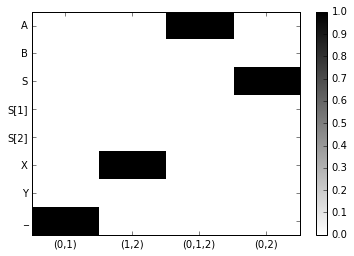

In [9]:
net.read_state()
net.plot_state()

Each role is occupied by a single filler. Because we did not consider the grammatical constraints at this time, the model randomly chose a filler in each role. Thus, the chosen structure can be ungrammatical.

#### All constraints combined

Before we run the model with all three constraints considered, we reset T to a small value (= 0.01). Small noise is required to introduce symmetry breaking in the present example. 

Note: If you run run the following code blocks with T = 0, you will see the model holds the blend state even when the discreteness pressure is large. This is because a subset of local constraints for T1 is perfectly balanced with another subset of local constraints for T2. External input as well as noise will break the symmetry in this case. 

In [10]:
net.opts['T_init'] = 0.01
net.opts['T_min'] = 0.01

# Turn on all three constraints
net.opts['H0_on'] = True
net.opts['H1_on'] = True
net.opts['Hq_on'] = True

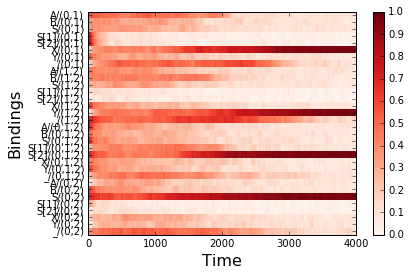

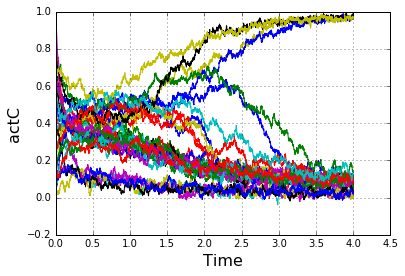

In [11]:
net.reset()
net.run(4, plot=True)    # plot the activation state change in the conceptual space in a heatmap form.
net.plot_trace('actC')   # plot the activation state change in the conceptual space in a line plot

         (0,1)     (1,2)   (0,1,2)     (0,2)
A     0.108105  0.068005  0.064786  0.054399
B     0.084710  0.084141  0.085979  0.086125
S     0.074940  0.084370  0.060642  0.971564
S[1]  0.051301  0.015319  0.099772  0.038518
S[2]  0.038820  0.006372  0.979103  0.026497
X     0.962635  0.058063  0.071051  0.061555
Y     0.088280  0.962979  0.113727  0.077329
_     0.115620  0.133869  0.107432  0.120538


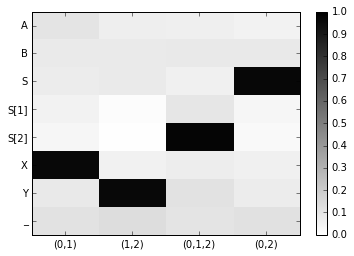

['X/(0,1)', 'Y/(1,2)', 'S[2]/(0,1,2)', 'S/(0,2)']


In [12]:
net.read_state()
net.plot_state()
print(net.read_grid_point(disp=False))  # Print the winners.
                                        # In each role, a filler with the max. act. will be chosen as a winner)

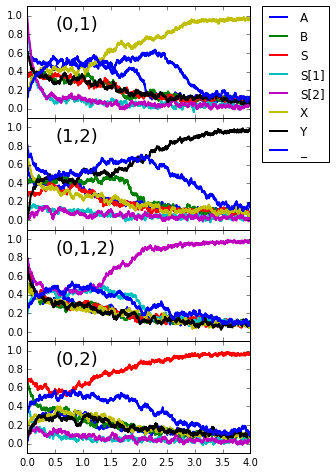

In [13]:
# the model stores the activation trace in neural coordinates
# we convert it to the trace in conceptual coordinates manually.
actC_trace = net.N2C(net.traces['act'].T).T
t_trace = net.traces['t']

# Then, we choose each subgroup of bindings that compete with each other.
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True, figsize=(4,8))
ax1.plot(t_trace, actC_trace[:, net.find_roles('(0,1)')], lw=2)
ax1.set_xlim(0, 4)
ax1.set_ylim(-0.1, 1.1)
ax1.text(0.5, 0.85, '(0,1)', fontsize=18)
ax1.legend(net.filler_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.plot(t_trace, actC_trace[:, net.find_roles('(1,2)')], lw=2)
ax2.text(0.5, 0.85, '(1,2)', fontsize=18)
ax3.plot(t_trace, actC_trace[:, net.find_roles('(0,1,2)')], lw=2)
ax3.text(0.5, 0.85, '(0,1,2)', fontsize=18)
ax4.plot(t_trace, actC_trace[:, net.find_roles('(0,2)')], lw=2)
ax4.text(0.5, 0.85, '(0,2)', fontsize=18)
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
None

The model builds a grammatical structure, either [$_\mathrm{S}$ [$_\mathrm{S[1]}$ [A B]]] or [$_\mathrm{S}$ [$_\mathrm{S[2]}$ [X Y]]]. In Part 2, we argued that the superposition of bindings is not catastrophic. This demo above suggests that the superposition of complete structures is not catastrophic, either. The model has the ability to consider multiple grammatical structures together and choose one over the others. The weights that implement binary harmonic grammar rules contain the information of which bindings must go with which which bindings and processing dynamics uses this information to unblend the ambiguous blend state to a grammatical symbolic structure. 

In this demo, we did not provide any external input to the model. Only by changing the discreteness pressure gradually, the model could build a grammatical structure. This case is special because there is no local ambiguity between input symbols and target structures. In general, even in simple grammars, the language processing system will encounter local ambiguity, the case in which linguistic input is consistent with multiple interpretations. The goal of incremental processing is to use the bottom-up information (linguistic input) as much as possible to exclude impossible interpretations and maintain all possible interpretations. In the next section, we show how the GSC model can achive the computational goals in a schematic way. 

## Incremental processing with external input handles local ambiguity

An intuitive way to understand processing dynamics of a GSC model is to visualize the harmony surface {($\mathbf{a}$, $H(\mathbf{a})$ | for every possible state $\mathbf{a}$} and investigate how the surface changes when external input is provided and the discreteness pressure increases. Typically, the GSC model has a high-dimensional state space so it is very hard to visualize the harmony surface directly. (Note: One solution is to focus on the topological structure of the harmony surface and visualize it as a disconnectivity graph [Becker & Karplus, 1997; Wales, Miller, & Walsh, 1998]). We used the method to show how the harmony surface changes while a GSC model is parsing a two-word sentence 'a b'. For details, see Cho and Smolensky (2016).) Here we will build simple 1D and 2D dynamical systems that share the same kind of constraints with the model presented in the above and investigate harmony surface change in those simplified systems. Even those minimal systems will reveal how the GSC model can solve two computational problems in incremental processing. 

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from ipywidgets import interact, FloatSlider
from IPython.display import HTML

### 1D example

Let us begin with the simplest case, a 1D dynamical system. Suppose a single, *continuous* state variable $x$ represents one of two discrete symbols, $\texttt{A}$ ($x$ = 1) or $\texttt{B}$ ($x$ = -1). We want the system to start at an arbitrary state and reach a grid state 1 or -1. If an external input is given to bias the system for one over the other, the end state must be consistent with the external input. 

Given the computational goal, we define Total Harmony at state $x$, $H(x; e, q, \mathbf{p})$, (see `harmony1D` in the following code block) as we do in the above. $e$ indicates an external input that biases the system toward either $\texttt{A}$ if $e$ = 1 or $\texttt{B}$ if $e$ = -1. $q$ represents quantization strength. The two parameters may change their values during incremental processing; as we described before, $q$ is assumed to increase gradually in time. We want to understand the effect of the two parameters on the harmony surface structure. $\mathbf{p}$ (see `params`) indicates a set of parameters that do not change in processing (e.g., weight values). 

With $H_0$ (= $H_G$) and $H_1$ (= $H_B$) together, the model prefers a blend state that is slightly biased toward the discrete state consistent with external input. $Q_0$ (corresponding to $H_{Q_0}$) makes the model to prefer a grid state. (In this 1D- and the next 2D-systems, we ignore $Q_1$ [= $H_{Q_1}$] because there is only one unit per role.)

The function `harmonyGrad1D` returns the derivative of Total Harmony evaluated at state $x$ in a given parameter setting ($ex$, $q$, and $\mathbf{p}$). As in the GSC model, $dx/dt = \nabla_x H(x)$ + noise. `run1D` updates the state for a given interval of time `tspan` during which $ex$ is fixed and $q$ increases linearly. `animate_run1D` is used to create an animation. 

In [15]:
# Although parameters 'W', 'b', and 'z' are not meaningful in this simple 1D system, 
# we keep them to make the model consistent with the GSC model studied in the main article. 
params = {      # parameters in conceptual coordinates
    'W': 0,     # (self-)weight
    'b': 0,     # bias
    'z': 0,     # bowl center
    'beta': 4   # bowl strength
}


def harmony1D(x, ex, q, params):
    # Returen the harmony value evalated at state x
    
    H_0 = 0.5 * x * params['W'] * x + params['b'] * x + ex * x
    H_1 = -(params['beta']/2) * (x-params['z'])**2
    Q_0 = -(x-1)**2 * (x+1)**2
    return (H_0 + H_1) + q * Q_0
    

def harmonyGrad1D(x, ex, q, params):
    # Return the harmony gradient evaluted at state x
    
    dH_0 = params['W'] * x + params['b'] + ex
    dH_1 = -params['beta'] * (x-params['z'])
    dQ_0 = -4 * x * (x-1) * (x+1)
    return (dH_0 + dH_1) + q * dQ_0


def plotSurface1D(ex, q):
    # Plot the 1D harmony surface
    
    X = np.linspace(-1.2, 1.2, 50)
    Y = harmony1D(X, ex, q, params)
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.grid(True)
    ax.plot(X, Y, lw=5, alpha=0.4)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-5.5, 0.5)
    ax.set_xlabel('$x$', fontsize=18)
    ax.set_ylabel('$H(x)$', fontsize=18)


def run1D(tspan, x_init, opts=None):
    # tspan: list [t_init, t_end]
    
    opts0 = {
        'params': params,
        'T_decay_rate': 0,
        'T_init': 0.01,
        'q_init': 0,
        'dq': 1,
        'max_dt': 0.05,
        'ex': 0
    }
    
    if opts is not None:
        for key in opts:
            if key in opts0:
                opts0[key] = opts[key]
            else:
                sys.exit('Cannot find the key, %s, in [opts] provided.'%key)
        opts = opts0
    
    if x_init is None:
        x = 0.1 * np.random.randn()
    else:
        x = x_init
    
    t = tspan[0]
    q = opts['q_init']
    T = opts['T_init']
    ex = opts['ex']

    t_trace = []
    x_trace = []
    h_trace = []
    T_trace = []
    q_trace = []
    surf_trace = []
    
    xvals = np.linspace(-1.2, 1.2, 100)
    
    # Log the initial state
    x_trace.append(x)
    h_trace.append(harmony1D(x, ex, q, params))
    T_trace.append(T)
    t_trace.append(t)
    q_trace.append(q)
    surf_trace.append(harmony1D(xvals, ex, q, params))
    
    while t <= tspan[1]:
        
        grad = harmonyGrad1D(x, ex, q, params)
        
        # Update the step size to prevent overflow
        if grad != 0:
            dt = min(opts['max_dt'], opts['max_dt']/abs(grad))
        else:
            dt = opts['max_dt']
        
        # Update state
        x = x + dt * grad + np.sqrt(2*T*dt) * np.random.randn()
        
        # update temperature (exponential decay)
        T = np.exp(-opts['T_decay_rate'] * dt) * T
        
        # update time
        t = t + dt
        
        # update q
        q = q + opts['dq'] * dt
        
        # Log
        x_trace.append(x)
        h_trace.append(harmony1D(x, ex, q, params))
        T_trace.append(T)
        t_trace.append(t)
        q_trace.append(q)
        surf_trace.append(harmony1D(xvals, ex, q, params))
        
    return (np.array(surf_trace)[:-1,:], np.array(x_trace)[:-1], np.array(h_trace)[:-1], 
            np.array(T_trace)[:-1], np.array(t_trace)[:-1], np.array(q_trace)[:-1])


def animate_run1D(surf_trace, x_trace, h_trace, T_trace, t_trace, q_trace):
    # Create an animation object

    fig, ax = plt.subplots(figsize=(6,5))
    
    line, = ax.plot([], [], lw=3)
    point, = ax.plot([], [], 'ro', markersize=10)
    text1 = ax.text(0.1, 0.9, '', transform=ax.transAxes, 
               horizontalalignment='left', fontsize=16)
    text2 = ax.text(0.1, 0.8, '', transform=ax.transAxes, 
               horizontalalignment='left', fontsize=16)
    text3 = ax.text(0.1, 0.7, '', transform=ax.transAxes, 
               horizontalalignment='left', fontsize=16)
    ax.set_xlabel('$x$', fontsize=18)
    ax.set_ylabel('$H$', fontsize=18)
    ax.set_xlim((-1.2,1.2))
    ax.set_ylim((-5, 0.5))
    ax.grid(True)
    plt.close()

    def init():
        line.set_data([], [])
        point.set_data([], [])
        text1.set_text('')
        text2.set_text('')
        text3.set_text('')
        return line, point, text1, text2, text3

    def animate(i):
        xvals = np.linspace(-1.2, 1.2, 100)
        line.set_data(xvals, surf_trace[i,:])
        point.set_data(x_trace[i], h_trace[i])
        text1.set_text('$t$ = %.02f' % t_trace[i])
        text2.set_text('$q$ = %.02f' % q_trace[i])
        text3.set_text('$T$ = %.03f' % T_trace[i])
        return line, point, text1, text2, text3

    anim = animation.FuncAnimation(
        fig, animate, init_func=init,
        frames=surf_trace.shape[0], interval=80, 
        repeat_delay=10, blit=True)

    return anim

Run the code block below and investigate how the shape of the harmony surface ($x$, $H(x)$) changes as a function of $ex$ and $q$. $ex$ can be set to 0 (no external input), 1 (external input, biasing the system toward $\texttt{A}$), or -1 (external input, biasing the system toward $\texttt{B}$).

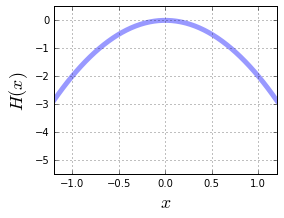

In [16]:
interact(plotSurface1D, 
         ex=FloatSlider(min=-1, max=1., step=0.2, continuous_update=False), 
         q=FloatSlider(min=0, max=5, step=0.2, continuous_update=False))
None

Note: the interactive widgets in this notebook will not be displayed in the HTML file. We recommend readers check the Jupyter/IPython notebook file.

First, set $e$ and $q$ to 0. You will see a single maximum at $x$ = 0 that is the optimal state given the constraints. If the system performs gradient ascent to maximize H, it will eventually reach the local maximum ($x$ = 0; in this case, the state is also the global maximum) wherever the initial state was. Then, increase $q$ gradually from 0 to 5 and see how the harmony surface changes. You will see the shape of the harmony surface changes qualitatively when $q$ is changing from 1 to 1.2. When $q$ is smaller than 1, there is a single /global maximum. However, when it is greater than 1.2, the surface has two local maxima that have the same Total Harmony. In dynamical systems theory, each local optimum is called an attractor (or a fixed point that is asymptotically stable) and the qualitative change in the harmony surface is called bifurcation. When a small amount of random noise is assumed (non-zero computational temperature $T$ in the GSC model), the system will reach state $x$=1, corresponding to the representation of a discrete symbol $\texttt{A}$, in about 50% of trials. 

Second, set $q$ to 0 again but at this time, set $e$ to 1. In other words, we consider a case in which the model receives external input suggesting $\texttt{A}$. The external input makes the state representing $\texttt{A}$ and its neighbor to have higher Total Harmony values than the state representing $\texttt{B}$ and its neighbor; note that $H_0$ has a term $e \cdot x$ in it, measuring how much the faithfulness constraint is satisfied. You will see Total Harmony is maximal at $x$ = 0.25. It is a blend state, an intermediate state between multiple discrete states, containing some information that $\texttt{A}$ should be preferred to $\texttt{B}$. Now increase $q$ from 0 to 5 slowly. The shape of the harmony surface changes qualitatively around at $q$ = 2. If the system has enough time before $q$ grows over 2, the state is likely to be near the global maximum before the bifurcation occurs. As $q$ increases more, the local/global optimum moves toward the ideal discrete state $x$ = 1 so the system will eventually reach $x$ = 1, representing $\texttt{A}$. Note that another locally optimal, but globally non-optimal state (that will evolve to another discrete state representing $\texttt{B}$) is separated by a harmony valley. Given that the system performs stochastic gradient ascent, it is hard to cross over the harmony valley unless computational noise is huge. 

#### Simultation

Let us investigate how the state changes in the model when the model receives $\texttt{A}$ as input (i.e., $e$ = 1). $q$ will increase linearly from 0 to 5 in a time interval [0, 5]. To emphasize the insensitivity of the model to its initial state, we set the initial state to $x$ = -1, representing $\texttt{B}$.

In [17]:
# surf_trace, x_trace, h_trace, T_trace, t_trace, q_trace = run1D([0, 5], x_init=-1, opts={'ex': 1})
# anim = animate_run1D(surf_trace, x_trace, h_trace, T_trace, t_trace, q_trace)
# # HTML(anim.to_html5_video())  # this can be slow
# anim.save('anim_1D.mp4', extra_args=['-vcodec', 'h264'])

In [18]:
HTML("""
<video controls autoplay loop>
  <source src="anim_1D.mp4" type="video/mp4">
</video>
""")

The above animation shows how the harmony surface changes as a function of $q$ when external input $e$ is fixed to 1. The moving red dot represents $x(t)$. As $q$ passes a critical value $q_c$, a harmony valley emerges to separate the state space into two subsets $X_L(q)$ and $X_R(q)$ ($q > q_c$), the regions coverged by the two local humps. For the system to reach the target state ($x$ = 1), it must be somewhere in $X_R(q)$ when $q$ passes $q_c$; for simplicity, we are ignoring noise. It is possible because when $q$ is low, the harmony surface has a single optimum which is biased toward the target state due to the external input so the system will quickly move to the global optimum.  

#### Simulated annealing

Before moving to a 2D example, we briefly discuss an alternative algorithm by which the model can reach the global optimum and then explain why we do not use it in incremental processing. 

The deterministic gradient ascent is a local optimization algorithm and may not converge to a global optimum. If the harmony surface is fixed, then where the system reaches is entirely determined by where the system starts. For example, consider the 1D example again but at this time, let us fix $q$ to 3. 

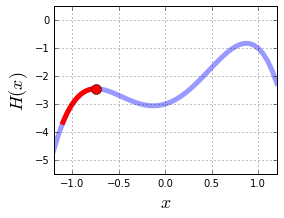

In [19]:
opts = {'ex': 1, 'dq': 0, 'q_init': 3, 'T_init': 0, 'max_dt': 0.001}
plotSurface1D(ex=1, q=3)
_, xtrace, htrace, _, _, _ = run1D([0, 1], x_init=-1.1, opts=opts)
plt.plot(xtrace, htrace, 'r-', lw=5)
plt.plot(xtrace[-1], htrace[-1], 'ro', markersize=10)
None

The figure above shows a sample state trajectory on the static harmony surface when the system starts at $x$ = -1.1 and $T$ = 0 (no noise). It converges to a local optimum indicated by the red dot. When T is 0, the system cannot go downhill so there is no way to escape from the local optimum. 

In many situations, however, we may want a system to be able to reach the global optimum regardless of where the system starts. One solution is simulated annealing (Geman & Geman, 1984; see also Chiang, Hwang, & Sheu, 1987). The idea is simple. We start a system at a high temperature and gradually reduces temperature---recall that the temperature determines the magnitude of noise when updating the state. Roughly speaking, when temperature is large (> $T_{c1}$), the state jumps between two humps. Temperature gradually decreases to a medium level ($T_{c1}$ > $T$ > $T_{c2}$) and during the period with this medium level of temperature, the state can jump from the left to the right hump but cannot jump from the right to the left hump; to jump from the right to the left hump, the state must go downhill more, which requires a greater amount of noise. Thus, if the system spends enough time at the medium temperature level, it will eventually move to and stay at the right hump. Then, temperature decreases further and the state will eventually reach the global optimum. The animation below shows how the state changes when simulated annealing is used. 

In [20]:
# Temperature must decrease VERY SLOWLY to converge to the global optimum.
# In the current setting (T_decay_rate=0.1), temperature decays quite fast. 
# Thus, sometime the model may converge to a local optimum 
# but most of times, the model will reach the global optimum.
np.random.seed(25)   # the system will reach the global optimum
# np.random.seed(120)  # the system will reach a local optimum

# Simulated annealing with a fixed harmony surface
opts_annealing = {
    'T_init': 1, 'T_decay_rate': 0.1,  # udpate T
    'q_init': 3, 'dq': 0,              # fix q
    'max_dt': 0.05,
    'ex': 1
}

surf_trace, x_trace, h_trace, T_trace, t_trace, q_trace = run1D([0, 30], x_init=-1, opts=opts_annealing)

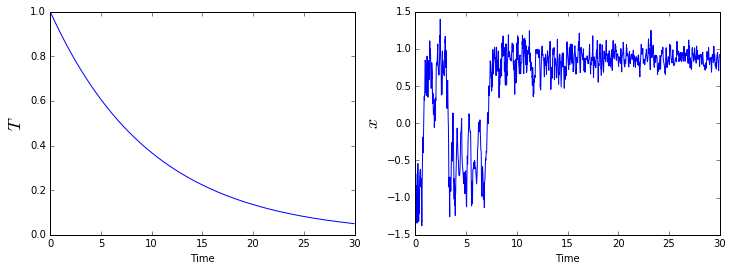

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(t_trace, T_trace)
ax1.set_xlabel('Time')
ax1.set_ylabel('$T$', fontsize=18)
ax2.plot(t_trace, x_trace)
ax2.set_xlabel('Time')
ax2.set_ylabel('$x$', fontsize=18)
ax2.set_ylim(-1.5, 1.5)
None

In [22]:
# anim = animate_run1D(surf_trace, x_trace, h_trace, T_trace, t_trace, q_trace)
# # HTML(anim.to_html5_video())  # this can be slow
# anim.save('anim_1Da.mp4', extra_args=['-vcodec', 'h264'])  # slow!!

In [23]:
HTML("""
<video controls autoplay loop>
  <source src="anim_1Da.mp4" type="video/mp4">
</video>
""")

In the sample run, the model has reached the global optimum when it started at x = -1. 

We do not use simulated annealing in incremental processing for the following reasons. First, in incremental processing, the model must encode a present linguistic input such that it can integrate it with future input. In the GSC model, the present state and the present $q$ value contain the information. Large noise required in simulated annealing will make the present state unreliable. In some sense, the model will develop a very noisy memory of the past. Second, in the GSC model, the harmony surface changes dynamically as $q$ increases. The 1D example above and the following 2D example suggest that when $q$ is carefully updated, the system can reach the target state without being stuck in an undesired local optimum.  

### 2D example

Let us investigate a 2D dynamical system. The system has four discrete symbolic states in a 2D state space: (1,1), (1,-1), (-1,1), (-1,1) representing tuples $(\texttt{A},\texttt{B})$, $(\texttt{A},\texttt{C})$, $(\texttt{D},\texttt{B})$, $(\texttt{D},\texttt{C})$. Those four tuples correspond to the symbolic interpretation of strings 'A B', 'A C', 'D B', 'D C', respectively. The first state variable $x_1$ represents two discrete symbols $\texttt{A}$ ($x_1$ = 1) and $\texttt{D}$ ($x_1$ = -1) at the first letter position and the second state variable $x_2$ represents two other discrete symbols $\texttt{B}$ ($x_2$ = 1) and $\texttt{C}$ ($x_2$ = -1) at the second letter position. No connection between two state variables is assumed, which means the model does not care what symbol can follow the first symbol. Although this model does not represent hierarchical constituent structures, it is still interesting because it shows how the GSC model can handle a discrete combinatorial system, creating local ambiguity in incremental processing. In this example, we will show how the model can exclude impossible interpretations given the first letter.

In [24]:
params = {
    'W': np.zeros((2,2)), # weight (2d-array)
    'b': np.zeros(2),     # bias (1d-array)
    'z': 0,               # bowl center
    'beta': 4             # bowl strength
}


def harmony2D(x1, x2, ex1, ex2, q, params):
    H_0 = 0.5 * (params['W'][0,0]*x1**2 + (params['W'][0,1]+params['W'][1,0])*x1*x2 + params['W'][1,1]*x2**2) + \
        params['b'][0]*x1 + params['b'][1]*x2 + ex1*x1 + ex2*x2
    H_1 = -(params['beta']/2) * ((x1-params['z'])**2 + (x2-params['z'])**2)
    Q_0 = -((x1-1)**2 * (x1+1)**2 + (x2-1)**2 * (x2+1)**2)
    return (H_0 + H_1) + q * Q_0


def harmonyGrad2D(x1, x2, ex1, ex2, q, params):
    dH0dx1 = params['W'][0,0]*x1 + params['W'][0,1]*x2 + params['b'][0] + ex1
    dH0dx2 = params['W'][1,0]*x1 + params['W'][1,1]*x2 + params['b'][1] + ex2
    dH1dx1 = -params['beta'] * (x1-params['z'])
    dH1dx2 = -params['beta'] * (x2-params['z'])
    dQ0dx1 = -4 * x1 * (x1-1) * (x1+1)
    dQ0dx2 = -4 * x2 * (x2-1) * (x2+1)
    dHdx1 = (dH0dx1 + dH1dx1) + q * dQ0dx1
    dHdx2 = (dH0dx2 + dH1dx2) + q * dQ0dx2
    return (dHdx1, dHdx2)


def plotSurface2DC(ex1, ex2, q):
    
    x1vals = x2vals = np.linspace(-1.2, 1.2, 20)
    X, Y = np.meshgrid(x1vals, x2vals)
    Z = harmony2D(X, Y, ex1, ex2, q, params)
    dX, dY = harmonyGrad2D(X, Y, ex1, ex2, q, params)
    speed = np.sqrt(dX*dX + dY*dY)
    lw = 5*speed / speed.max()
    
    fig = plt.figure(figsize=plt.figaspect(0.4))
    
    # Plot1: surface plot
    ax1 = fig.add_subplot(1,2,1,projection='3d')
    surf = ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax1.set_xlabel('$x_1$')
    ax1.set_ylabel('$x_2$')
    ax1.set_zlabel('$H(x_1, x_2)$')
    
    # Plot2: contour plot with streamlines
    ax2 = fig.add_subplot(1,2,2)
    cs = ax2.contour(X, Y, Z, 20, alpha=0.5, cmap=plt.cm.coolwarm)
    strm = ax2.streamplot(X, Y, dX, dY, density=0.4, linewidth=1)
    ax2.plot([1,1,-1,-1], [1,-1,1,-1], 'ro')
    ax2.grid(True)
    ax2.set_xlabel('$x_1$')
    ax2.set_ylabel('$x_2$')
    ax2.set_xlim(-1.1,1.1)
    ax2.set_ylim(-1.1,1.1)


def run2D(dur, x_init, opts=None):
    
    opts0 = {
        'params': params,
        'T_decay_rate': 0,
        'T_init': 0.01,
        'q_init': 0,
        'dq': 1,
        'max_dt': 0.01,
        'ex': np.zeros(2)
    }
    
    if opts is not None:
        for key in opts:
            if key in opts0:
                opts0[key] = opts[key]
            else:
                sys.exit('Cannot find the key, %s, in [opts] provided.'%key)
        opts = opts0
    
    if x_init is None:
        x = 0.1 * np.random.randn(2)
    else:
        x = x_init 
    
    t = dur[0]
    q = opts['q_init']
    T = opts['T_init']
    ex = opts['ex']

    t_trace = []
    x_trace = []
    h_trace = []
    T_trace = []
    q_trace = []
    surf_trace = []
    
    # meshgrid
    x1vals = x2vals = np.linspace(-1.2, 1.2, 20)
    X, Y = np.meshgrid(x1vals, x2vals)
    
    # Log the initial state
    x_trace.append(x)
    h_trace.append(harmony2D(x[0], x[1], ex[0], ex[1], q, params))
    T_trace.append(T)
    t_trace.append(t)
    q_trace.append(q)
    surf_trace.append(harmony2D(X, Y, ex[0], ex[1], q, params))

    while t <= dur[1]:
        
        grad = np.array(harmonyGrad2D(x[0], x[1], ex[0], ex[1], q, params))
        
        # Update the step size to prevent overflow
        len_grad = np.sqrt(grad.dot(grad))
        
        if len_grad != 0:
            dt = min(opts['max_dt'], opts['max_dt']/len_grad)
        else:
            dt = opts['max_dt']
        
        # Update state
        x = x + dt * grad + np.sqrt(2*T*dt) * np.random.randn(2)
        
        # update temperature (exponential decay)
        T = np.exp(-opts['T_decay_rate'] * dt) * T
        
        # update time
        t = t + dt
        
        # update q
        q = q + opts['dq'] * dt
        
        # Log
        x_trace.append(x)
        h_trace.append(harmony2D(x[0], x[1], ex[0], ex[1], q, params))
        T_trace.append(T)
        t_trace.append(t)
        q_trace.append(q)
        surf_trace.append(harmony2D(X, Y, ex[0], ex[1], q, params))
        
    return (np.array(surf_trace)[:-1,:,:], np.array(x_trace)[:-1,:], np.array(h_trace)[:-1], 
            np.array(T_trace)[:-1], np.array(t_trace)[:-1], np.array(q_trace)[:-1])


def animate_run2D(surf_trace, x_trace, h_trace, T_trace, t_trace, q_trace, ex_trace):
    
    zlim = (-8, -1)
    angle0 = 300
    angle1 = 320
    d_angle = (angle1 - angle0) / t_trace.shape[0]
    
    # meshgrid
    x1vals = x2vals = np.linspace(-1.2, 1.2, 20)
    X, Y = np.meshgrid(x1vals, x2vals)
    
    fig = plt.figure(figsize=(8, 7))
    ax = fig.add_subplot(111, projection='3d')
    plt.close()
    
    def init():
        ax.clear()
        ax.set_zlim(zlim)
        
        ct = ax.contour(X, Y, surf_trace[0,:,:], zdir='z', offset=zlim[0], cmap=plt.cm.coolwarm)
        sf = ax.plot_surface(X, Y, surf_trace[0,:,:], rstride=1, cstride=1, 
                             cmap=plt.cm.coolwarm, linewidth=0, antialiased=True)
        pt, = ax.plot([x_trace[0,0]], [x_trace[0,1]], [h_trace[0]], 'go', markersize=10, zorder=10)
        pt, = ax.plot([x_trace[0,0]], [x_trace[0,1]], [zlim[0]], 'go', markersize=10, zorder=10, alpha=0.3)
        ax.text2D(0.1, 0.9, '$t$ = %.02f' % t_trace[0], 
                  transform=ax.transAxes, horizontalalignment='left', fontsize=16)
        ax.text2D(0.1, 0.8, '$q$ = %.02f' % q_trace[0], 
                  transform=ax.transAxes, horizontalalignment='left', fontsize=16)
        ax.text2D(0.1, 0.7, '$T$ = %.03f' % T_trace[0], 
                  transform=ax.transAxes, horizontalalignment='left', fontsize=16)
        ax.set_xlabel('$x_1$', fontsize=18)
        ax.set_ylabel('$x_2$', fontsize=18)
        ax.set_zlabel('Harmony', fontsize=18)
        
        ax.plot([-1,-1], [-1,-1], [harmony2D(-1, -1, ex_trace[0,0], ex_trace[0,1], q_trace[0], params), zlim[0]], 'k--')
        ax.plot([-1,-1], [+1,+1], [harmony2D(-1, +1, ex_trace[0,0], ex_trace[0,1], q_trace[0], params), zlim[0]], 'k--')
        ax.plot([+1,+1], [-1,-1], [harmony2D(+1, -1, ex_trace[0,0], ex_trace[0,1], q_trace[0], params), zlim[0]], 'k--')
        ax.plot([+1,+1], [+1,+1], [harmony2D(+1, +1, ex_trace[0,0], ex_trace[0,1], q_trace[0], params), zlim[0]], 'k--')
        ax.text(-1, -1, zlim[0], 'S4', fontsize=18, verticalalignment='center', horizontalalignment='center')
        ax.text(-1, +1, zlim[0], 'S3', fontsize=18, verticalalignment='center', horizontalalignment='center')
        ax.text(+1, -1, zlim[0], 'S2', fontsize=18, verticalalignment='center', horizontalalignment='center')
        ax.text(+1, +1, zlim[0], 'S1', fontsize=18, verticalalignment='center', horizontalalignment='center')
        ax.plot([-1], [-1], [harmony2D(-1, -1, ex_trace[0,0], ex_trace[0,1], q_trace[0], params)], 'ko', zorder=2)
        ax.plot([-1], [+1], [harmony2D(-1, +1, ex_trace[0,0], ex_trace[0,1], q_trace[0], params)], 'ko', zorder=2)
        ax.plot([+1], [-1], [harmony2D(+1, -1, ex_trace[0,0], ex_trace[0,1], q_trace[0], params)], 'ko', zorder=2)
        ax.plot([+1], [+1], [harmony2D(+1, +1, ex_trace[0,0], ex_trace[0,1], q_trace[0], params)], 'ko', zorder=2)
        
        ax.contour(X, Y, surf_trace[0,:,:], zdir='z', offset=zlim[0], cmap=plt.cm.coolwarm)
        ax.view_init(20, angle0)
        
        plt.draw()
        return ct, sf, pt,

    def animate(i):
        ax.clear()
        ax.set_zlim(zlim)
        
        ct = ax.contour(X, Y, surf_trace[i,:,:], zdir='z', offset=zlim[0], cmap=plt.cm.coolwarm)
        sf = ax.plot_surface(X, Y, surf_trace[i,:,:], rstride=1, cstride=1, 
                             cmap=plt.cm.coolwarm, linewidth=0, antialiased=True, alpha=0.8)
        pt, = ax.plot([x_trace[i,0]], [x_trace[i,1]], [h_trace[i]], 'go', markersize=10, zorder=10)
        pt, = ax.plot([x_trace[i,0]], [x_trace[i,1]], [zlim[0]], 'go', markersize=10, zorder=10, alpha=0.4)
        ax.text2D(0.1, 0.9, '$t$ = %.02f' % t_trace[i], 
                  transform=ax.transAxes, horizontalalignment='left', fontsize=16)
        ax.text2D(0.1, 0.8, '$q$ = %.02f' % q_trace[i], 
                  transform=ax.transAxes, horizontalalignment='left', fontsize=16)
        ax.text2D(0.1, 0.7, '$T$ = %.03f' % T_trace[i], 
                  transform=ax.transAxes, horizontalalignment='left', fontsize=16)
        if ex_trace[i, 0] == 1:
            ax.text2D(0.8, 0.9, 'input: A (%d, %d)' % (ex_trace[i,0], ex_trace[i,1]), 
                      transform=ax.transAxes, horizontalalignment='left', fontsize=16)
        elif ex_trace[i, 1] == 1:
            ax.text2D(0.8, 0.9, 'input: B (%d, %d)' % (ex_trace[i,0], ex_trace[i,1]), 
                      transform=ax.transAxes, horizontalalignment='left', fontsize=16)
        ax.set_xlabel('$x_1$', fontsize=18)
        ax.set_ylabel('$x_2$', fontsize=18)
        ax.set_zlabel('Harmony', fontsize=18)

        ax.plot([-1,-1], [-1,-1], [harmony2D(-1, -1, ex_trace[i,0], ex_trace[i,1], q_trace[i], params), zlim[0]], 'k--')
        ax.plot([-1,-1], [+1,+1], [harmony2D(-1, +1, ex_trace[i,0], ex_trace[i,1], q_trace[i], params), zlim[0]], 'k--')
        ax.plot([+1,+1], [-1,-1], [harmony2D(+1, -1, ex_trace[i,0], ex_trace[i,1], q_trace[i], params), zlim[0]], 'k--')
        ax.plot([+1,+1], [+1,+1], [harmony2D(+1, +1, ex_trace[i,0], ex_trace[i,1], q_trace[i], params), zlim[0]], 'k--')
        ax.text(-1, -1, zlim[0], 'S4', fontsize=18, verticalalignment='center', horizontalalignment='center')
        ax.text(-1, +1, zlim[0], 'S3', fontsize=18, verticalalignment='center', horizontalalignment='center')
        ax.text(+1, -1, zlim[0], 'S2', fontsize=18, verticalalignment='center', horizontalalignment='center')
        ax.text(+1, +1, zlim[0], 'S1', fontsize=18, verticalalignment='center', horizontalalignment='center')
        ax.plot([-1], [-1], [harmony2D(-1, -1, ex_trace[i,0], ex_trace[i,1], q_trace[i], params)], 'ko', zorder=2)
        ax.plot([-1], [+1], [harmony2D(-1, +1, ex_trace[i,0], ex_trace[i,1], q_trace[i], params)], 'ko', zorder=2)
        ax.plot([+1], [-1], [harmony2D(+1, -1, ex_trace[i,0], ex_trace[i,1], q_trace[i], params)], 'ko', zorder=2)
        ax.plot([+1], [+1], [harmony2D(+1, +1, ex_trace[i,0], ex_trace[i,1], q_trace[i], params)], 'ko', zorder=2)

        ax.view_init(20, angle0 + d_angle * i)
        
        return ct, sf, pt,

    anim = animation.FuncAnimation(
        fig, animate, init_func=init,
        frames=surf_trace.shape[0], interval=30, 
        repeat_delay=10, blit=False) #blit=True)
    
    return anim

Run the following code block to generate the interactive harmony surface plots. As in the 1D case, you can change $ex_1$, $ex_2$, and $q$ to see how the harmony surface changes. 

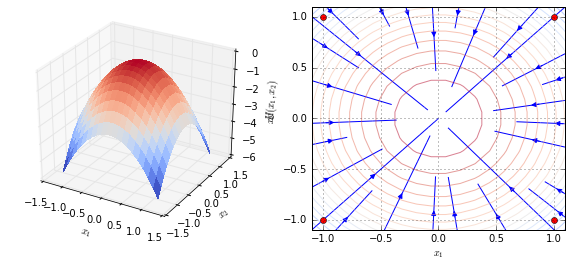

In [25]:
interact(plotSurface2DC, ex1=FloatSlider(min=-1, max=1, step=0.2, continuous_update=False), 
         ex2=FloatSlider(min=-1, max=1, step=0.2,continuous_update=False), 
         q=FloatSlider(min=0, max=5, step=0.2,continuous_update=False))
None

The left panel shows the harmony surface in a 3D surface plot and the right panel shows the same harmony surface in a 2D contour plot. The red and blue colors represent higher and lower harmony, respectively. A small number of sampled state changes (a.k.a. streamlines) is overlayed on the contour plot. The four red dots correspond to four discrete symbolic states.

First, set all three free parameters to 0. The system has a global optimum at (0, 0). Increase $q$ gradually and check when the shape of the harmony surface changes qualitatively. When $q$ increases from 1 to 1.2, the previously global optimum is broken into four local maxima; to see the change, pay attention to the streamlines in the right panel. As $q$ increases more and more, the four local optima become more apparent. With small random noise, the system will reach one of the four discrete states eventually.

Second, set $q$ back to 0 and $ex_1$ to 1. Keep the value of $ex_2$ to 0. This case corresponds to a model that receives input $\texttt{A}$ as the first symbol of a string. The system has the highest harmony at (1/4, 0). Increase $q$ gradually from 0 to 2. You will see the global maximum moves toward a positive $x_1$ axis and the shape of harmony surface changes qualitatively when $q$ increases from 0.8 to 1. Now the model has two local optima so even with a small noise, the system will move one of them. In this two-alphabet string case, it is not good to increase $q$ too much. To see the reason, increase $q$ to 5. If $q$ has increased slowly and gradually, the state when $q$ = 5 will be near (1,1) or (1,-1), corresponding to tuples $\texttt{(A,B)}$ or $\texttt{(A,C)}$. Suppose the system is near $\texttt{(A,C)}$ when $q$ = 5 and receives the second alphabet input 'B'. To see the change in the harmony surface, set $ex_1$ to 0 and $ex_2$ to 1. We set $ex_1$ to 0 because we assume the system does not keep every past history explicitly. It is highly likely that the human language processing system can keep track of a small number of past input symbols but the number cannot be very huge. Our goal is to understand a mechanism to store the information on past history implicitly without expliciting keeping all the previous input symbols. (We can add an additional memory mechanism with which the model can keep previous input symbols---in this example, $ex_1$.) Note that the harmony surface does not change much. (1, -1) is still the local maxium so the system will stay near the discrete state. In this case, the actual input was 'A B' but the system has reached (1, -1) representing $\texttt{(A,C)}$.

In the below, we consider three different scenarios with regard to the $q$ update. 

#### Case 1: $q$ increases appropriately

First, we show that the model can parse a sentence accurately if $q$ increases neither too slowly nor too fast. In the below example, $q$ increases linearly from 0 to 1.2 while the model processes the first word 'A' in the time interval [0, 1.2] and from 1.2 to 3.0 while the model processes the second word 'B' in the time interval [1.2, 2.4].  

In [26]:
np.random.seed(20)

dur = 1.2    # word duration
q_A = 1.2    # q val after processing the first word (t = 1.2)

# policy1
dq_A = q_A / dur            # the amount of change in q divided by the interval length
dq_B = (3.0 - q_A) / dur

# Run the model with input 'A'
ex_A = np.array([1, 0])
surf1, xtrace1, htrace1, Ttrace1, ttrace1, qtrace1 = run2D(
    [0, 1.2], x_init=None, 
    opts={'ex': ex_A, 'T_init': 0.05, 'dq': dq_A})
extrace1 = np.tile(ex_A, (ttrace1.shape[0], 1))

# Run the model with input 'B'
ex_B = np.array([0, 1])
surf2, xtrace2, htrace2, Ttrace2, ttrace2, qtrace2 = run2D(
    [ttrace1[-1], 2.4], x_init=xtrace1[-1,:], 
    opts={'ex': ex_B, 'q_init': qtrace1[-1], 'T_init': 0.05, 'dq': dq_B})
extrace2 = np.tile(ex_B, (ttrace2.shape[0], 1))

# Combine the data
surf = np.concatenate((surf1, surf2), axis=0)
xtrace = np.concatenate((xtrace1, xtrace2), axis=0)
htrace = np.concatenate((htrace1, htrace2), axis=0)
Ttrace = np.concatenate((Ttrace1, Ttrace2), axis=0)
ttrace = np.concatenate((ttrace1, ttrace2), axis=0)
qtrace = np.concatenate((qtrace1, qtrace2), axis=0)
extrace = np.concatenate((extrace1, extrace2), axis=0)

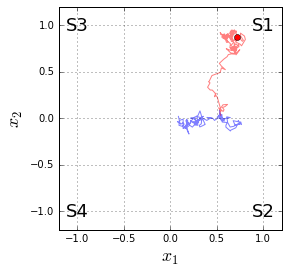

In [27]:
# Plot the state trajectory
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(xtrace[ttrace < 1.2, 0], xtrace[ttrace < 1.2, 1], 'b-', alpha=0.5)
ax.plot(xtrace[ttrace >= 1.2, 0], xtrace[ttrace >= 1.2, 1], 'r-', alpha=0.5)
ax.plot(xtrace[-1, 0], xtrace[-1, 1], 'ro')  # the end state
ax.text(1, 1, 'S1', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(1, -1, 'S2', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(-1, 1, 'S3', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(-1, -1, 'S4', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.grid()
None

The blue and red lines indicate the state change while the model was processing the first and the second words, respectively. The red dot indicates the end state. 

In [28]:
# # Create the animation
# anim = animate_run2D(surf, xtrace, htrace, Ttrace, ttrace, qtrace, extrace)
# # HTML(anim.to_html5_video())  # this can be slow
# anim.save('anim_2Da.mp4', extra_args=['-vcodec', 'h264'])

In [29]:
HTML("""
<video controls autoplay loop>
  <source src="anim_2Da.mp4" type="video/mp4">
</video>
""")

At the beginning, the harmony surface has a single global optimum (because $q$ is low), which is biased toward $\texttt{A}$ at the first position due to the faithfulness constraint ($ex_1$ = 1). Both interpretations, $\texttt{(A,B)}$ and $\texttt{(A,C)}$, consistent witht he first word input are equally good---the states representing the two interpretations have the same total harmony values. $q$ increases gradually so the harmony surface changes gradually as well. The state climbs up the harmony hill to reach the highest point. Then, the harmony surface changes abruptly. This is due to discrete external input update from $\texttt{A}$ at the first position to $\texttt{B}$ at the second position ($ex_1$ was set to 0 and $ex_2$ was set to 1). Now the states consistent with the second word input have the same harmony value; in other words, given $q$ and external input, both interpretations $\texttt{(A,B)}$ and $\texttt{(D,B)}$ are equally good. However, $q$ continues to grow and at some point, the topological structure of the harmony surface changes qualitatively (i.e., a bifurcation occurred!) and multiple local optima emerge. Each local hump is separated from every other hump. At that time, the system's state is on the hump containing a state representing the target interpretation $\texttt{(A,B)}$. On average, the state does not roll down a hill to jump to other hills. Thus, the system reaches the target state.

Both 1D and 2D examples show that (1) external input increases grammar harmony H$_0$ (so total harmony H as well) of the states representing discrete, symbolic structures that are locally coherent with the input; (2) increasing quantization force reshapes the harmony surface and separates every discrete state from every other discrete state. By combining (1) and (2), the GSC model can solve the computational problems arising in incremental processing.

#### Case 2: $q$ increases too slowly

In this example, we show that if $q$ increases too slowly while the model was processing the first word 'A', the model may fail to parse a sentence. $q$ increases linearly from 0 to 0.3 while the model processes the first word 'A' in the time interval [0, 1.2] and from 0.3 to 3.0 while the model processes the second word 'B' in the time interval [1.2, 2.4]. 

In [30]:
np.random.seed(20)

dur = 1.2    # word duration
q_A = 0.3    # q val after processing the first word (t = 1.2)

# policy2
dq_A = q_A / dur            # the amount of change in q divided by the interval length
dq_B = (3.0 - q_A) / dur

# Run the model with input 'A'
ex_A = np.array([1, 0])
surf1, xtrace1, htrace1, Ttrace1, ttrace1, qtrace1 = run2D(
    [0, 1.5], x_init=None, opts={'ex': ex_A, 'dq': dq_A, 'T_init': 0.05})
extrace1 = np.tile(ex_A, (ttrace1.shape[0], 1))

# Run the model with input 'B'
ex_B = np.array([0, 1])
surf2, xtrace2, htrace2, Ttrace2, ttrace2, qtrace2 = run2D(
    [ttrace1[-1], 3.0], x_init=xtrace1[-1,:], opts={'ex': ex_B, 'q_init': qtrace1[-1], 'dq': dq_B, 'T_init': 0.05})
extrace2 = np.tile(ex_B, (ttrace2.shape[0], 1))

# Combine the data
surf = np.concatenate((surf1, surf2), axis=0)
xtrace = np.concatenate((xtrace1, xtrace2), axis=0)
htrace = np.concatenate((htrace1, htrace2), axis=0)
Ttrace = np.concatenate((Ttrace1, Ttrace2), axis=0)
ttrace = np.concatenate((ttrace1, ttrace2), axis=0)
qtrace = np.concatenate((qtrace1, qtrace2), axis=0)
extrace = np.concatenate((extrace1, extrace2), axis=0)

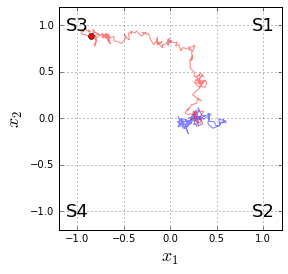

In [31]:
# Plot the state trajectory
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(xtrace[ttrace < 1.2, 0], xtrace[ttrace < 1.2, 1], 'b-', alpha=0.5)
ax.plot(xtrace[ttrace >= 1.2, 0], xtrace[ttrace >= 1.2, 1], 'r-', alpha=0.5)
ax.plot(xtrace[-1, 0], xtrace[-1, 1], 'ro')  # the end state
ax.text(1, 1, 'S1', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(1, -1, 'S2', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(-1, 1, 'S3', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(-1, -1, 'S4', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.grid()
None

In [32]:
# # Create the animation
# anim = animate_run2D(surf, xtrace, htrace, Ttrace, ttrace, qtrace, extrace)
# # HTML(anim.to_html5_video())  # this can be slow
# anim.save('anim_2Db.mp4', extra_args=['-vcodec', 'h264'])

In [33]:
HTML("""
<video controls autoplay loop>
  <source src="anim_2Db.mp4" type="video/mp4">
</video>
""")

In this scenario, the model increased $q$ very slowly while it was processing the first word 'A'. The global optimum is only weakly biased toward S1 and S2 (consistent with input 'A'). When the second word 'B' was presented, the harmony surface changed but due to a small value of $q$, the harmony surface still had a single optimum, which is biased toward S1 and S3 (consistent with input 'B'). The system moved close to the new optimum before harmony valleyes emerged. When emerging harmony valleys were shallow, the system was near the bottom of the harmony valley so the model could jump between two local humps (containing S1 and S3) with a small amount of noise. In the example, the model chose a wrong hump (containing S3) over the target hump (containing S1). This is a local coherence error because the model chose a structure that is *locally* coherent (i.e., coherent with the bottom-up input) but *globally* incoherent  (i.e., incoherent with context, the first word 'A').

#### Case 3: $q$ increases too quickly

If $q$ increases too quickly while the model was processing the first word 'A', the model fails to maintain multiple possible interpretations (both of S1 and S2 are consistent with the first word 'A') and chooses one over the other. In this example, $q$ increases linearly from 0 to 2.4 while the model processes the first word 'A' in the time interval [0, 1.2] and from 2.4 to 3.0 while the model processes the second word 'B' in the time interval [1.2, 2.4]. 

In [34]:
np.random.seed(100)

dur = 1.2    # word duration
q_A = 2.4    # q val after processing the first word (t = 1.2)

# policy3
dq_A = q_A / dur            # the amount of change in q divided by the interval length
dq_B = (3.0 - q_A) / dur

# Run the model with input 'A'
ex_A = np.array([1, 0])
surf1, xtrace1, htrace1, Ttrace1, ttrace1, qtrace1 = run2D(
    [0, 1.5], x_init=None, opts={'ex': ex_A, 'dq': dq_A, 'T_init': 0.05})
extrace1 = np.tile(ex_A, (ttrace1.shape[0], 1))

# Run the model with input 'B'
ex_B = np.array([0, 1])
surf2, xtrace2, htrace2, Ttrace2, ttrace2, qtrace2 = run2D(
    [ttrace1[-1], 3.0], x_init=xtrace1[-1,:], opts={'ex': ex_B, 'q_init': qtrace1[-1], 'dq': dq_B, 'T_init': 0.05})
extrace2 = np.tile(ex_B, (ttrace2.shape[0], 1))

# Combine the data
surf = np.concatenate((surf1, surf2), axis=0)
xtrace = np.concatenate((xtrace1, xtrace2), axis=0)
htrace = np.concatenate((htrace1, htrace2), axis=0)
Ttrace = np.concatenate((Ttrace1, Ttrace2), axis=0)
ttrace = np.concatenate((ttrace1, ttrace2), axis=0)
qtrace = np.concatenate((qtrace1, qtrace2), axis=0)
extrace = np.concatenate((extrace1, extrace2), axis=0)

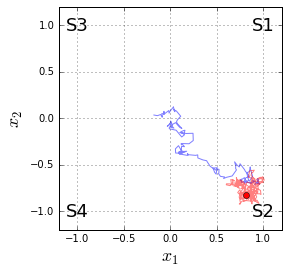

In [35]:
# Plot the state trajectory
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(xtrace[ttrace < 1.2, 0], xtrace[ttrace < 1.2, 1], 'b-', alpha=0.5)
ax.plot(xtrace[ttrace >= 1.2, 0], xtrace[ttrace >= 1.2, 1], 'r-', alpha=0.5)
ax.plot(xtrace[-1, 0], xtrace[-1, 1], 'ro')  # the end state
ax.text(1, 1, 'S1', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(1, -1, 'S2', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(-1, 1, 'S3', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(-1, -1, 'S4', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.grid()
None

In [36]:
# # Create the animation
# anim = animate_run2D(surf, xtrace, htrace, Ttrace, ttrace, qtrace, extrace)
# # HTML(anim.to_html5_video())  # this can be slow
# anim.save('anim_2Dc.mp4', extra_args=['-vcodec', 'h264'])

In [37]:
HTML("""
<video controls autoplay loop>
  <source src="anim_2Dc.mp4" type="video/mp4">
</video>
""")

In this scenario, the model increased $q$ very quickly while it was processing the first word 'A'. Before the second word was presented, harmony valleys emerged so the model was forced to make a decision between S1 and S2 which are consistent with input 'A'. In this sample run, the model chose S2 over S1. Then, the model was given the second word 'B', which is consistent with S1 and S3. During processing the second word, the local humps containing S1 and S3 have higher harmony values than the other two local humps containing S2 and S4. But every hump was already separated from every other hump by deep harmony valleys. Thus, the system could not escape from the S2 hump. This is a garden path error. 

### A GSC model

In this section, we investigate the GSC model implementing a similar but slightly more complex grammar G = {S $\rightarrow$ A B | A C | D B | D C}. At this time, we assume that the interpretations of the sentences are not the tuples but the tree structures. 

In [38]:
cfg = 'S -> A B | A C | D B | D C'
hg = gsc.HarmonicGrammar(cfg=cfg, size=2, role_type='span_role', unary_base='filler')
net = gsc.GscNet(hg=hg, opts={'T_init': 0.01})

In [39]:
net.opts['q_rate'] = 0
net.opts['T_init'] = 0
net.reset()
net.run(5)
mu = net.actC

net.opts['T_init'] = 0.01

#### Case 1: $q$ increases appropriately

The state after processing S1='A B'


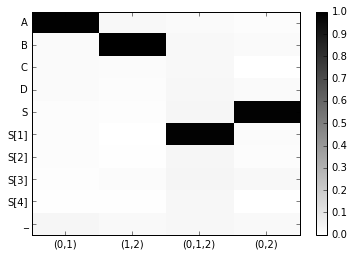

State trajectory


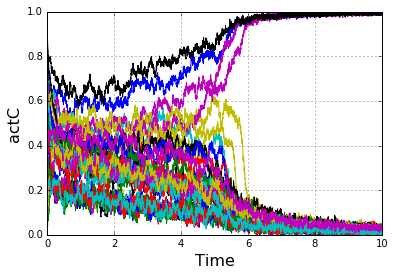

In [40]:
# Case 1
# q increases linearly 
# from 0 to 25 during the first word
# from 25 to 200 during the second word
np.random.seed(20)

dur = 5        # word length
q_A = 25
net.reset()
net.opts['q_rate'] = q_A / dur
net.set_init_state(mu=net.actC, sd=0.01)
net.set_input('A/(0,1)', 1.0)
net.run(dur)
net.opts['q_rate'] = (200 - q_A) / dur
net.set_input('B/(1,2)', 1.0)
net.run(dur)

print("The state after processing S1='A B'")
net.plot_state()
print('State trajectory')
plt.ylim(0,1)
plt.xlim(0,10)
net.plot_trace('actC')

To compare the result with the 2D examples that we investigated, we project the state trajectories in the 40 dimensional vector space onto a 2D plane as follows:

$$x_1 = (\mathit{act}(\mathrm{S}[1]/(0,1,2)) + \mathit{act}(\mathrm{S}[2]/(0,1,2))) - (\mathit{act}(\mathrm{S}[3]/(0,1,2)) + \mathit{act}(\mathrm{S}[4]/(0,1,2)))$$
$$x_2 = (\mathit{act}(\mathrm{S}[1]/(0,1,2)) + \mathit{act}(\mathrm{S}[3]/(0,1,2))) - (\mathit{act}(\mathrm{S}[2]/(0,1,2)) + \mathit{act}(\mathrm{S}[4]/(0,1,2)))$$

The figure below shows the state trajectory. The blue and red lines indicate the state changes while the model was processing the first and the second word, respectively. The red dot indicates the end state.

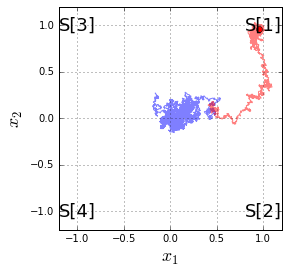

In [41]:
trace = net.N2C(net.traces['act'].T).T
trace_focus = trace[:, net.find_bindings(['S[1]/(0,1,2)', 'S[2]/(0,1,2)', 'S[3]/(0,1,2)', 'S[4]/(0,1,2)'])]
x1 = ((trace_focus[:, 0] + trace_focus[:, 1]) - (trace_focus[:, 2] + trace_focus[:, 3]))
x2 = ((trace_focus[:, 0] + trace_focus[:, 2]) - (trace_focus[:, 1] + trace_focus[:, 3]))

# Plot the state trajectory
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot(x1[:int(dur/net.dt)], x2[:int(dur/net.dt)], 'b-', alpha=0.5)
plt.plot(x1[int(dur/net.dt):], x2[int(dur/net.dt):], 'r-', alpha=0.5)
# plt.plot(x1, x2, alpha=0.5)
plt.plot(x1[-1], x2[-1], 'ro')
ax.text(1, 1, 'S[1]', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(1, -1, 'S[2]', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(-1, 1, 'S[3]', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(-1, -1, 'S[4]', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.grid()
None

#### Case 2: $q$ increases too slowly

The state after processing S1='A B'


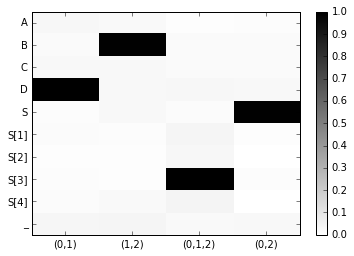

State trajectory


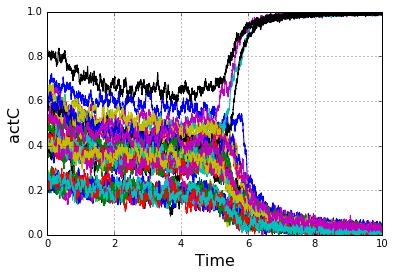

In [42]:
# Case 2: 
# q increases linearly 
# from 0 to 5 during the first word
# from 5 to 200 during the second word
np.random.seed(15)

dur = 5
q_A = 5
net.reset()
net.opts['q_rate'] = q_A / dur
net.set_init_state(mu=mu, sd=0.01)
net.set_input('A/(0,1)', 1.0)
net.run(dur)
net.opts['q_rate'] = (200 - q_A) / dur
net.set_input('B/(1,2)', 1.0)
net.run(dur)

print("The state after processing S1='A B'")
net.plot_state()
print('State trajectory')
plt.ylim(0,1)
plt.xlim(0,10)
net.plot_trace('actC')

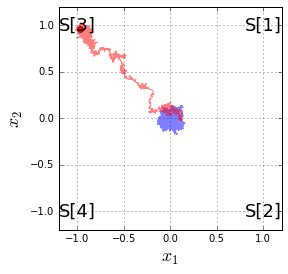

In [43]:
trace = net.N2C(net.traces['act'].T).T
trace_focus = trace[:, net.find_bindings(['S[1]/(0,1,2)', 'S[2]/(0,1,2)', 'S[3]/(0,1,2)', 'S[4]/(0,1,2)'])]
x1 = ((trace_focus[:, 0] + trace_focus[:, 1]) - (trace_focus[:, 2] + trace_focus[:, 3]))
x2 = ((trace_focus[:, 0] + trace_focus[:, 2]) - (trace_focus[:, 1] + trace_focus[:, 3]))

# Plot the state trajectory
fig, ax = plt.subplots()
ax.set_aspect('equal')
# plt.plot(x1, x2, alpha=0.5)
plt.plot(x1[:int(dur/net.dt)], x2[:int(dur/net.dt)], 'b-', alpha=0.5)
plt.plot(x1[int(dur/net.dt):], x2[int(dur/net.dt):], 'r-', alpha=0.5)
plt.plot(x1[-1], x2[-1], 'ro')
ax.text(1, 1, 'S[1]', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(1, -1, 'S[2]', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(-1, 1, 'S[3]', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(-1, -1, 'S[4]', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.grid()
None

#### Case 3: $q$ increases too quickly

The state after processing S1='A B'


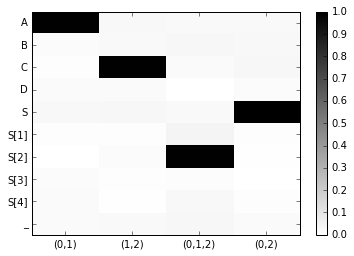

State trajectory


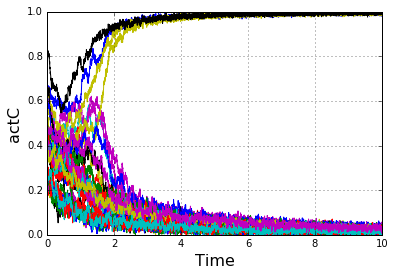

In [44]:
# Case 3: 
# q increases linearly 
# from 0 to 100 during the first word
# from 100 to 200 during the second word
np.random.seed(85)

dur = 5
q_A = 100
net.reset()
net.opts['q_rate'] = q_A / dur
net.set_init_state(mu=mu, sd=0.01)
net.set_input('A/(0,1)', 1.0)
net.run(dur)
net.opts['q_rate'] = (200 - q_A) / dur
net.set_input('B/(1,2)', 1.0)
net.run(dur)

print("The state after processing S1='A B'")
net.plot_state()
print('State trajectory')
plt.ylim(0,1)
plt.xlim(0,10)
net.plot_trace('actC')

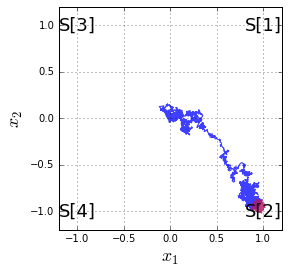

In [45]:
trace = net.N2C(net.traces['act'].T).T
trace_focus = trace[:, net.find_bindings(['S[1]/(0,1,2)', 'S[2]/(0,1,2)', 'S[3]/(0,1,2)', 'S[4]/(0,1,2)'])]
x1 = ((trace_focus[:, 0] + trace_focus[:, 1]) - (trace_focus[:, 2] + trace_focus[:, 3]))
x2 = ((trace_focus[:, 0] + trace_focus[:, 2]) - (trace_focus[:, 1] + trace_focus[:, 3]))

# Plot the state trajectory
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot(x1, x2, alpha=0.5)
# plt.plot(x1[-1], x2[-1], 'ro')
plt.plot(x1[:int(dur/net.dt)], x2[:int(dur/net.dt)], 'b-', alpha=0.5)
plt.plot(x1[int(dur/net.dt):], x2[int(dur/net.dt):], 'r-', alpha=0.5)
ax.text(1, 1, 'S[1]', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(1, -1, 'S[2]', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(-1, 1, 'S[3]', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.text(-1, -1, 'S[4]', fontsize=18, horizontalalignment='center', verticalalignment='center')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.grid()
None

#### References

* Chiang, T., Hwang, C., & Sheu, S. (1987). Diffusion for global optimization in $\mathbb{R}^n $. SIAM Journal on Control and Optimization, 25(3), 737–753. https://doi.org/10.1137/0325042
* Geman, S., & Geman, D. (1984). Stochastic relaxation, Gibbs distributions, and the Bayesian restoration of images. IEEE Transactions on Pattern Analysis and Machine Intelligence, PAMI-6(6), 721–741. https://doi.org/10.1109/TPAMI.1984.4767596